In [2]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.68-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)


       0     1  2
0   3079  2375  0
1   3181  2256  0
2   3064  2134  0
3   3205  2028  0
4   3193  1825  0
5   3025  1893  0
6   3025  1685  0
7   3188  1584  0
8   3044  1480  0
9   3168  1375  0
10  2996  1278  0
11  3055  1075  0
12  3017   938  0
13  3005   815  1
    0         1         2         3         4
0   0  0.593943  0.687211  0.023148  0.060764
1   0  0.613619  0.652778  0.023148  0.060764
2   0  0.591049  0.617477  0.023148  0.060764
3   0  0.618248  0.586806  0.023148  0.060764
4   0  0.615934  0.528067  0.023148  0.060764
5   0  0.583526  0.547743  0.023148  0.060764
6   0  0.583526  0.487558  0.023148  0.060764
7   0  0.614969  0.458333  0.023148  0.060764
8   0  0.587191  0.428241  0.023148  0.060764
9   0  0.611111  0.397859  0.023148  0.060764
10  0  0.577932  0.369792  0.023148  0.060764
11  0  0.589313  0.311053  0.023148  0.060764
12  0  0.581983  0.271412  0.023148  0.060764
13  0  0.579668  0.235822  0.023148  0.060764


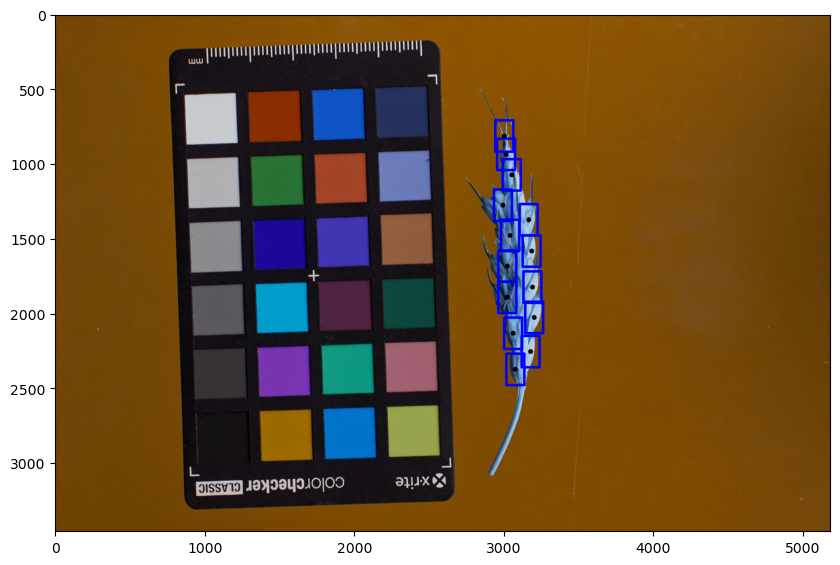

In [16]:
import cv2
import csv
from matplotlib import pyplot as plt
import pandas as pd

name = "IMG_0406"
img = cv2.imread("raw_images/" + name + ".jpg")

roi = pd.read_csv("raw_rois/" + name + ".roi2", header=None, index_col=None, delimiter=";")

labels = [0] * len(roi)
x_center = []
y_center = []
r_width = []
r_height = []

print(roi)

color = (0, 0, 255)
thickness = 15

x = roi.iloc[0, 0]
y = roi.iloc[0, 1]
    
img = cv2.circle(img, (int(x), int(y)), radius=8, color=(0, 0, 0), thickness=15)

for i in range(len(roi)):
    x = roi.iloc[i, 0]
    y = roi.iloc[i, 1]
    
    img = cv2.circle(img, (int(x), int(y)), radius=8, color=(0, 0, 0), thickness=15)
    
    WIDTH = img.shape[1]
    HEIGHT = img.shape[0]
    
    rect_width = 120
    rect_height = 210

    start_point = (int(x - rect_width / 2), int(y - rect_height / 2))
    end_point = (int(x + rect_width / 2), int(y + rect_height / 2))
    
    img = cv2.rectangle(img, start_point, end_point, color, thickness)
    
    x_center.append(round(x / WIDTH, 6))
    y_center.append(round(y / HEIGHT, 6))
    r_width.append(round(rect_width / WIDTH, 6))
    r_height.append(round(rect_height / HEIGHT, 6))
    

plt.figure(figsize=(10, 10))
plt.imshow(img)

data = []

for i in zip(labels, x_center, y_center, r_width, r_height):
    data.append(i)

df = pd.DataFrame(data, columns=None)
print(df)
df.to_csv("text.txt", header=None, index=None, sep=' ')

In [43]:
with open('textfile.txt', 'w') as f:
    for line in text:
        f.write(line)
        f.write('\n')